In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
watch_time = pd.read_csv("../data/watch_time_by_trial_day.csv", index_col=0)

In [3]:
watch_time.head()

,user_uid,day_1_total_watchtime,day_1_watched_video_length,day_2_total_watchtime,day_2_watched_video_length,day_3_total_watchtime,day_3_watched_video_length,day_-3_total_watchtime,day_-3_watched_video_length,day_-2_total_watchtime,day_-2_watched_video_length,day_-1_total_watchtime,day_-1_watched_video_length
0,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,526,NaN,NaN,1177.0,1899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1419,3949.0,6445.0,1193.0,3055.0,125.0,1480.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3113,303.0,558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4377,1375.0,1701.0,NaN,NaN,NaN,NaN,NaN,NaN,1220.0,1274.0,NaN,NaN


In [4]:
combined = pd.read_csv("../data/skillshare_2022_starts_views_combined.csv", index_col=0)
combined.head()

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31
0,23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
watch_time = pd.merge(watch_time, combined[["user_uid", "success"]], on="user_uid")

watch_time = watch_time.fillna(0.0)

In [6]:
watch_time

,user_uid,day_1_total_watchtime,day_1_watched_video_length,day_2_total_watchtime,day_2_watched_video_length,day_3_total_watchtime,day_3_watched_video_length,day_-3_total_watchtime,day_-3_watched_video_length,day_-2_total_watchtime,day_-2_watched_video_length,day_-1_total_watchtime,day_-1_watched_video_length,success
0,389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,526,0.0,0.0,1177.0,1899.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1419,3949.0,6445.0,1193.0,3055.0,125.0,1480.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3113,303.0,558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4377,1375.0,1701.0,0.0,0.0,0.0,0.0,0.0,0.0,1220.0,1274.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236224,26284119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
236225,26284144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
236226,26284161,2.0,342.0,14.0,342.0,3.0,342.0,0.0,0.0,0.0,0.0,0.0,0.0,0
236227,26284162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
watch_time[["day_1_total_watchtime", "day_-1_total_watchtime"]].dropna(how="all")

,day_1_total_watchtime,day_-1_total_watchtime
0,0.0,0.0
1,0.0,0.0
2,3949.0,0.0
3,303.0,0.0
4,1375.0,0.0
...,...,...
236224,0.0,0.0
236225,0.0,0.0
236226,2.0,0.0
236227,0.0,0.0


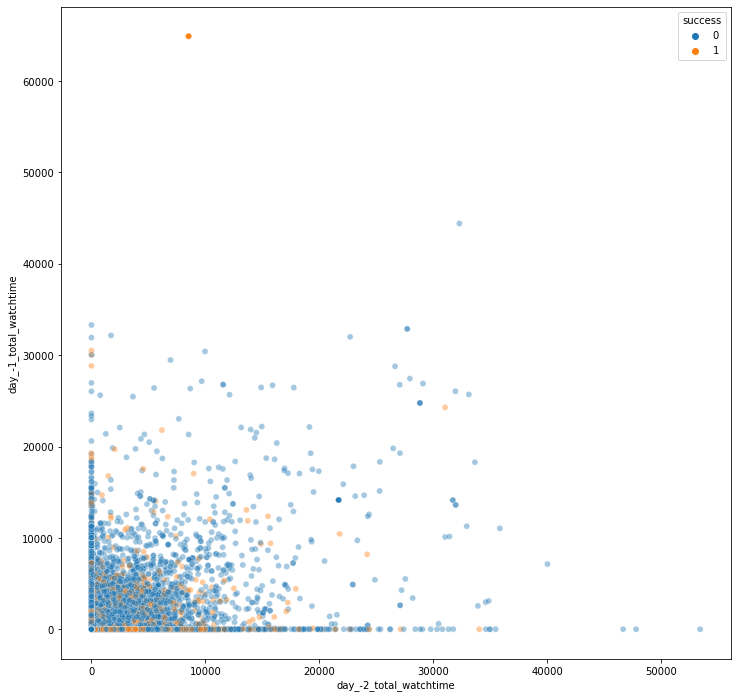

In [8]:
plt.figure(figsize=(12,12))
sns.scatterplot(
        data=watch_time,
        x="day_-2_total_watchtime",
        y="day_-1_total_watchtime",
        alpha=0.4,
        hue="success")
plt.show()

In [9]:
watch_time["mean_first_3_days"] = watch_time[["day_1_total_watchtime", "day_2_total_watchtime", "day_3_total_watchtime"]]\
    .mean(axis=1)\
    .fillna(0.0)
watch_time["mean_last_3_days"] = watch_time[["day_-1_total_watchtime", "day_-2_total_watchtime", "day_-3_total_watchtime"]]\
    .mean(axis=1)\
    .fillna(0.0)
watch_time.head()

,user_uid,day_1_total_watchtime,day_1_watched_video_length,day_2_total_watchtime,day_2_watched_video_length,day_3_total_watchtime,day_3_watched_video_length,day_-3_total_watchtime,day_-3_watched_video_length,day_-2_total_watchtime,day_-2_watched_video_length,day_-1_total_watchtime,day_-1_watched_video_length,success,mean_first_3_days,mean_last_3_days
0,389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.000000
1,526,0.0,0.0,1177.0,1899.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,392.333333,0.000000
2,1419,3949.0,6445.0,1193.0,3055.0,125.0,1480.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1755.666667,0.000000
3,3113,303.0,558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,101.000000,0.000000
4,4377,1375.0,1701.0,0.0,0.0,0.0,0.0,0.0,0.0,1220.0,1274.0,0.0,0.0,0,458.333333,406.666667


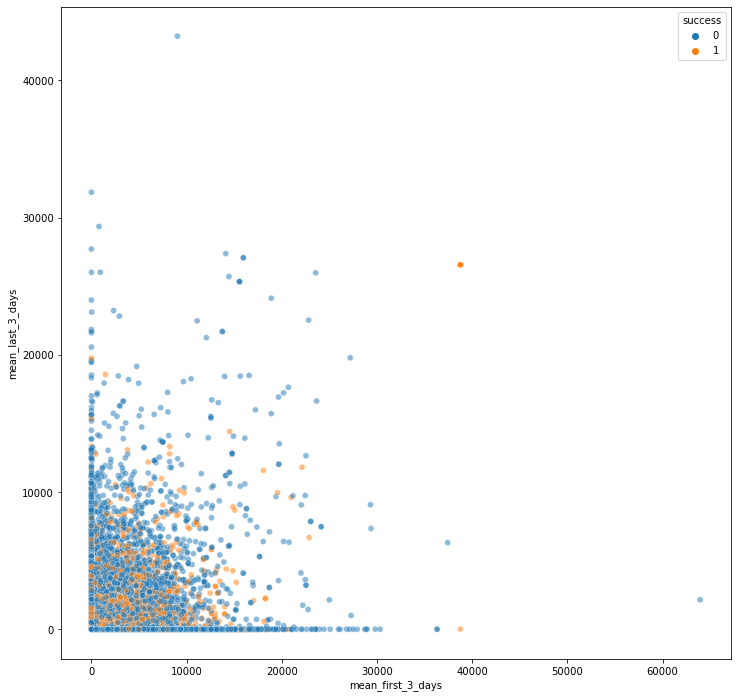

In [10]:
plt.figure(figsize=(12,12))
sns.scatterplot(
        data=watch_time,
        x="mean_first_3_days",
        y="mean_last_3_days",
        alpha=0.5,
        hue="success")
plt.show()

In [11]:
# X = watch_time.drop(columns=["user_uid", "success"])
# y = watch_time.success
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# rfclf = RandomForestClassifier()
# rfclf.fit(X_train, y_train)
# rfclf.score(X_test, y_test)

In [38]:
time_cols = [ col for col in watch_time.columns if "watchtime" in col ]

by_success_viz = watch_time\
    .groupby("success")\
    .mean()[time_cols].T\
    .reset_index()\
    .rename(columns={"index":"day", 0:"churn", 1:"subscribe"})\
    .melt(id_vars=["day"], value_vars=["churn", "subscribe"], value_name="watch_time")

by_success_viz["day"] = by_success_viz["day"].str.replace("_total_watchtime", "")
by_success_viz["day"] = by_success_viz["day"].str.replace("day_", "")
by_success_viz["day"] = by_success_viz.day.astype(int)

by_success_viz

,day,success,watch_time
0,1,churn,833.216818
1,2,churn,628.633294
2,3,churn,528.356777
3,-3,churn,239.986264
4,-2,churn,182.536583
5,-1,churn,119.730714
6,1,subscribe,856.493824
7,2,subscribe,642.851758
8,3,subscribe,536.579228
9,-3,subscribe,261.352240


In [42]:
alt.Chart(by_success_viz)\
    .mark_circle()\
    .encode(
        x=alt.X("day"),
        y=alt.Y("watch_time"),
        color=alt.Color("success"))

alt.Chart(...)